In [49]:
import pandas as pd
import numpy as ny
import seaborn as sn
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('../input/salaries-data/levels_fyi_salary_data.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [52]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['basesalary'] = df['basesalary'].astype(int)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                62642 non-null  datetime64[ns]
 1   company                  62637 non-null  object        
 2   level                    62523 non-null  object        
 3   title                    62642 non-null  object        
 4   totalyearlycompensation  62642 non-null  int64         
 5   location                 62642 non-null  object        
 6   yearsofexperience        62642 non-null  float64       
 7   yearsatcompany           62642 non-null  float64       
 8   tag                      61788 non-null  object        
 9   basesalary               62642 non-null  int64         
 10  stockgrantvalue          62642 non-null  float64       
 11  bonus                    62642 non-null  float64       
 12  gender                   43102 n

In [54]:
df.drop(['rowNumber', 'dmaid', 'cityid', 'stockgrantvalue', 'timestamp'], axis = 1, inplace = True)

In [55]:
df.head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,bonus,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,10000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,35000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [56]:
def faang_classifier(company):
    faang = ['Facebook', 'Amazon', 'Apple', 'Netflix', 'Google']
    if company in faang:
        return 1
    else:
        return 0

In [57]:
df['is_faang'] = df['company'].apply(lambda x:  faang_classifier(x))

df.head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,bonus,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,is_faang
0,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,10000.0,...,0,0,0,0,0,0,0,NaN,NaN,0
1,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,0.0,...,0,0,0,0,0,0,0,NaN,NaN,0
2,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,0.0,...,0,0,0,0,0,0,0,NaN,NaN,1
3,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,35000.0,...,0,0,0,0,0,0,0,NaN,NaN,1
4,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,0.0,...,0,0,0,0,0,0,0,NaN,NaN,0


In [58]:
df.replace("", ny.nan, inplace= True)

In [59]:
df.isna().sum()

company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
bonus                          0
gender                     19540
otherdetails               22505
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
is_faang                       0
dtype: int64

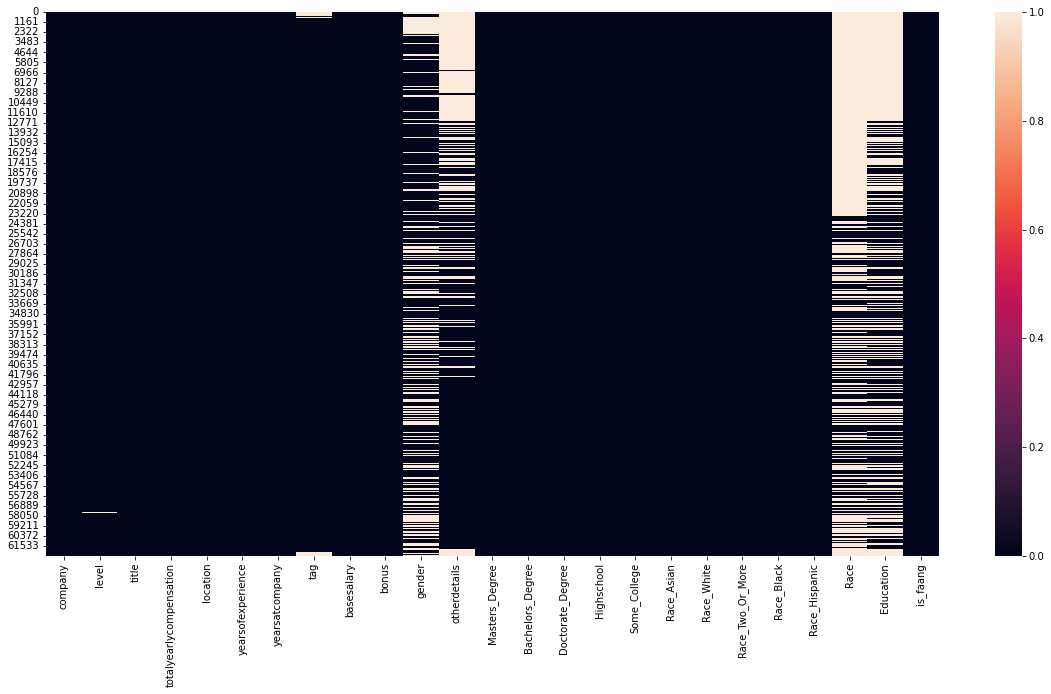

In [60]:
plt.figure(figsize= (20, 10))
sn.heatmap(df.isna())
plt.show()

In [61]:
col_num = df.select_dtypes(['float64', 'int64', 'int32'])
col_categ = df.select_dtypes(['object'])

In [62]:
for col in col_num.columns:
    df[col].fillna(df[col].mean(), inplace= True)

In [63]:
for col in col_categ.columns:
    df[col].fillna(df[col].mode().values[0], inplace= True)

In [64]:
df.isna().sum()

company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
bonus                      0
gender                     0
otherdetails               0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
Race                       0
Education                  0
is_faang                   0
dtype: int64

In [65]:
df.duplicated().sum()

302

In [66]:
df = df.drop_duplicates()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


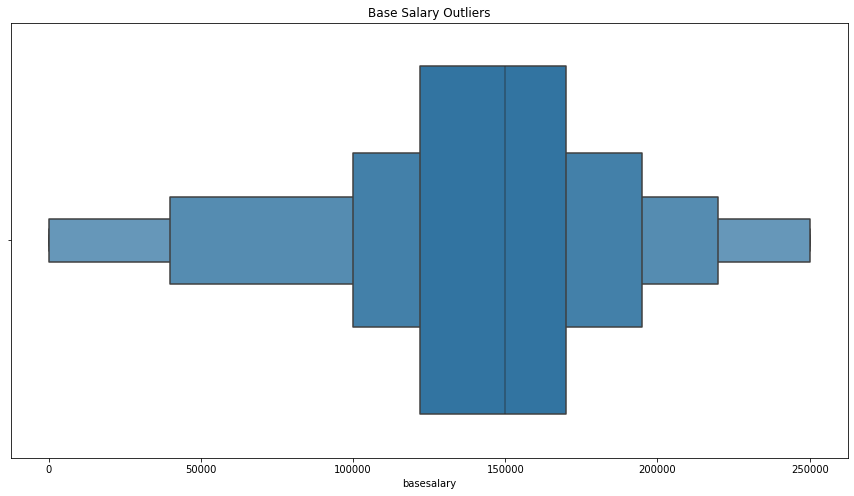

In [87]:
plt.figure(figsize= (15, 8))

sn.boxenplot(df.basesalary)
plt.title('Base Salary Outliers')

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


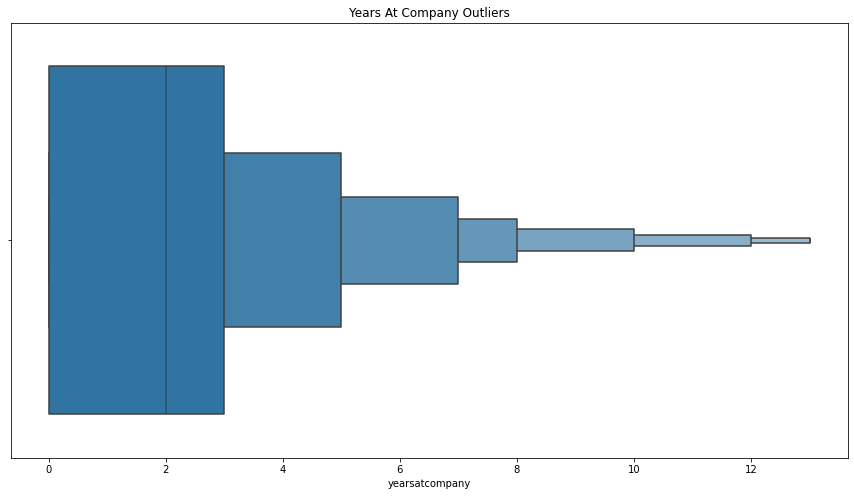

In [88]:
plt.figure(figsize= (15, 8))

sn.boxenplot(df.yearsatcompany)
plt.title('Years At Company Outliers')

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


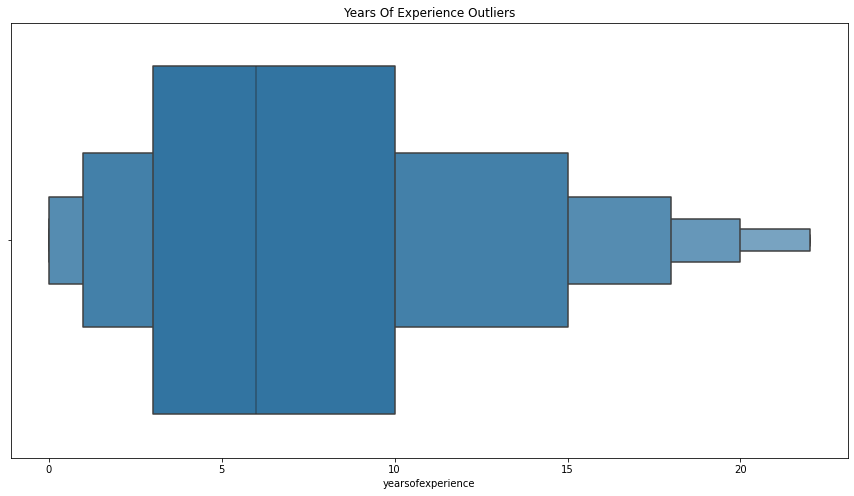

In [89]:
plt.figure(figsize= (15, 8))

sn.boxenplot(df.yearsofexperience)

plt.title('Years Of Experience Outliers')
plt.show()

In [70]:
from scipy.stats.mstats import winsorize

lim_inferior = 0.02
lim_superior = 0.02

In [71]:
col_to_winsorize = ['basesalary', 'yearsatcompany', 'yearsofexperience']

for col in col_to_winsorize:
    df[col] = winsorize(df[col], limits= [lim_inferior, lim_superior])

In [72]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,is_faang
count,6.234000e+04,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000
mean,2.163281e+05,7.136051,2.630751,135159.180382,19338.694189,0.246182,0.201861,0.028858,0.005133,0.005695,0.188450,0.128649,0.012865,0.011020,0.018094,0.282820
std,1.381433e+05,5.593899,2.927262,54702.034952,26800.859652,0.430789,0.401392,0.167408,0.071462,0.075248,0.391075,0.334814,0.112693,0.104398,0.133294,0.450373
min,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,108000.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,140000.000000,14000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,170000.000000,26000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.980000e+06,22.000000,13.000000,250000.000000,1000000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
df = df[df['is_faang'] == 1]

In [74]:
df.sample(5)

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,bonus,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,is_faang
35675,Amazon,SDE II,Software Engineer,325000,"Palo Alto, CA",4.0,1.0,Full Stack,180000,25000.0,...,0,0,1,0,0,0,0,Asian,Master's Degree,1
18111,Google,L7,Product Manager,402000,"Mountain View, CA",22.0,1.0,ML / AI,239000,60000.0,...,0,0,0,0,0,0,0,Asian,Master's Degree,1
31961,Google,L5,Software Engineer,320000,"Seattle, WA",21.0,6.0,Distributed Systems (Back-End),165000,30000.0,...,0,0,0,0,0,0,0,Asian,Master's Degree,1
27005,Amazon,L4,Business Analyst,60000,"Sydney, NS, Australia",1.0,1.0,Growth,60000,0.0,...,0,0,0,0,0,0,0,Asian,Master's Degree,1
19978,Amazon,L5 SDM,Software Engineer,90000,"San Diego, CA",4.0,2.0,iOS,60000,10000.0,...,0,0,0,0,0,0,0,Asian,Master's Degree,1


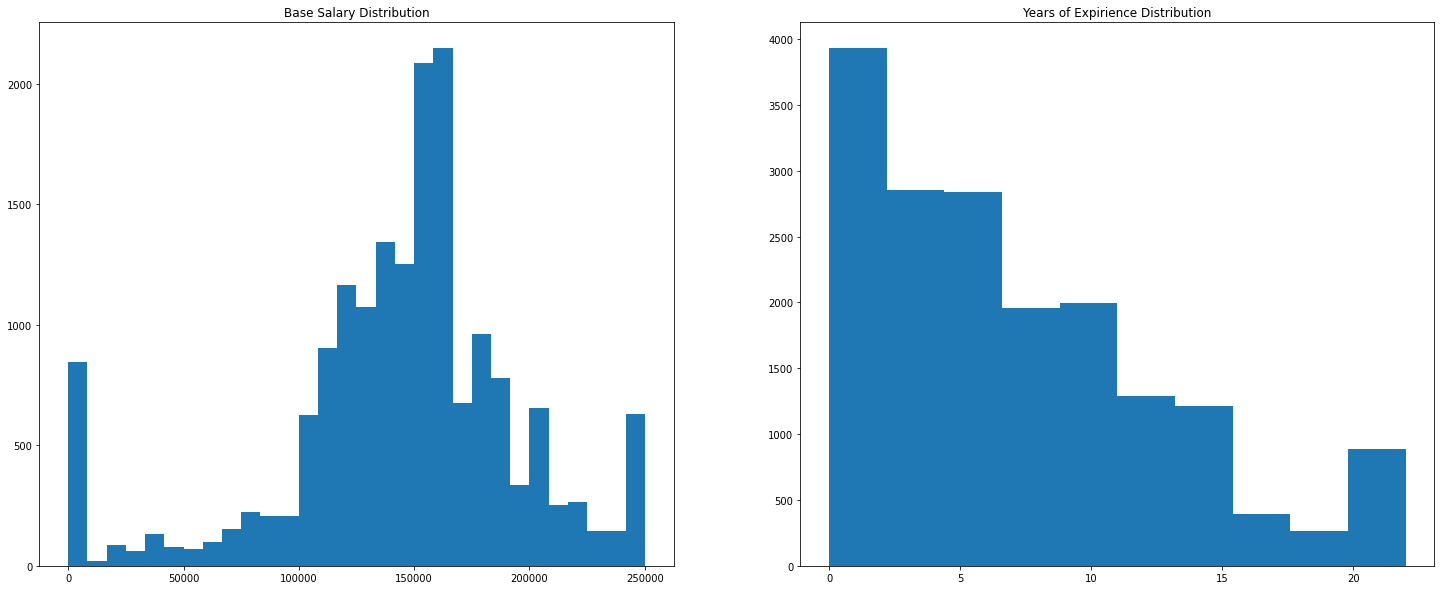

In [75]:
plt.figure(figsize= (25, 10))

plt.subplot(1, 2, 1)
plt.hist(x = df['basesalary'], bins= 30)
plt.title('Base Salary Distribution')

plt.subplot(1, 2, 2)
plt.hist( x = df['yearsofexperience'], bins = 10)
plt.title('Years of Expirience Distribution')

plt.show()

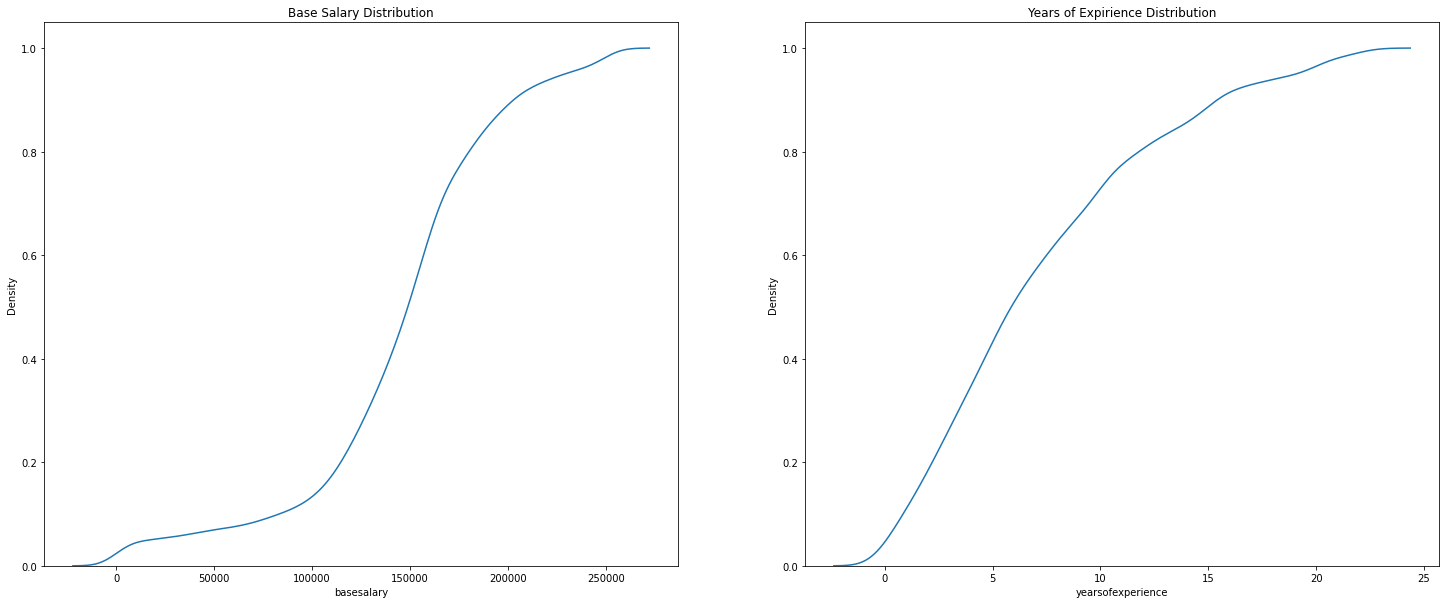

In [76]:
plt.figure(figsize = (25, 10))

plt.subplot(1, 2, 1)
sn.kdeplot(data = df, x = 'basesalary', cumulative= True)
plt.title('Base Salary Distribution')

plt.subplot(1, 2, 2)
sn.kdeplot(data = df, x = 'yearsofexperience', cumulative= True)
plt.title('Years of Expirience Distribution')

plt.show()

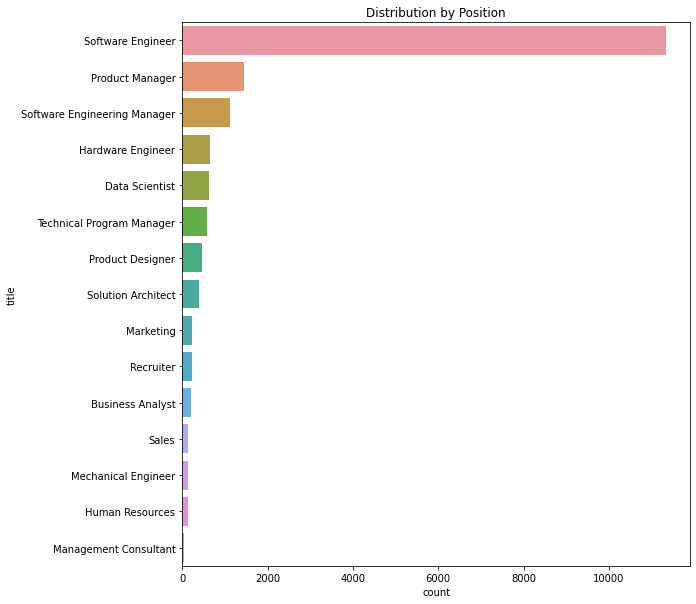

In [77]:
plt.figure(figsize= (20, 10))

plt.subplot(1, 2, 1)
sn.countplot(data = df, y = 'title', order= df['title'].value_counts().index)
plt.title('Distribution by Position')

plt.show()

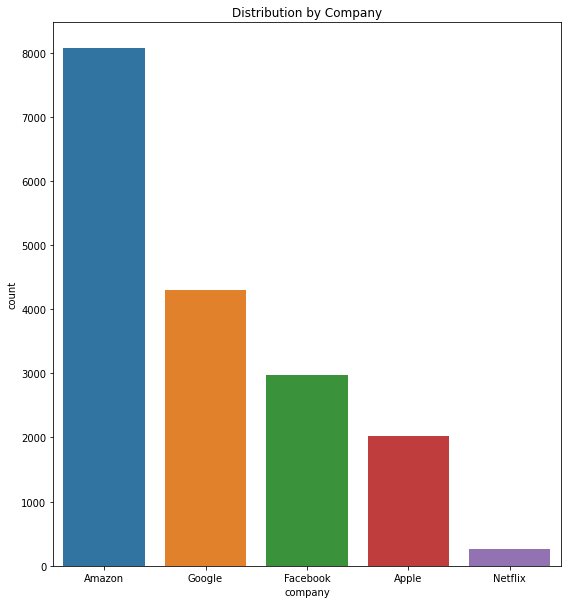

In [78]:
plt.figure(figsize= (20, 10))

plt.subplot(1, 2, 1)
sn.countplot(data= df, x = 'company', order= df['company'].value_counts().index)
plt.title('Distribution by Company')

plt.show()

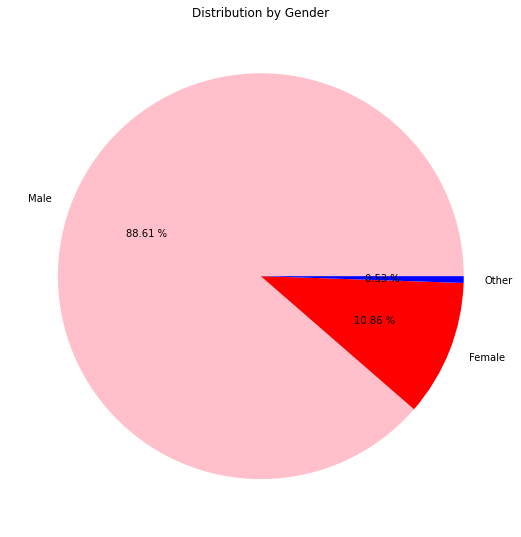

In [79]:
count_gender = df['gender'].value_counts()
labels = df['gender'].unique()
colors = ['pink', 'red', 'blue']

plt.figure(figsize= (20, 10))

plt.subplot(1, 2, 1)
plt.pie(count_gender, labels = labels, autopct= '%0.2f %%', colors = colors)
plt.title('Distribution by Gender')
plt.show()

In [80]:
df.corr()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,is_faang
totalyearlycompensation,1.000000,0.505560,0.316496,0.564444,0.418209,0.022206,-0.082902,0.097903,-0.010145,0.012303,-0.043455,0.018944,-0.004538,-0.015260,-0.031440,NaN
yearsofexperience,0.505560,1.000000,0.421088,0.350230,0.210733,0.053421,-0.058214,-0.011595,0.003775,0.033514,-0.062365,0.066464,-0.003121,-0.008161,-0.003114,NaN
yearsatcompany,0.316496,0.421088,1.000000,0.161512,-0.058416,-0.003674,-0.010417,0.003975,-0.011001,-0.004277,-0.012790,0.029405,-0.009327,-0.035978,-0.019515,NaN
basesalary,0.564444,0.350230,0.161512,1.000000,0.357533,0.112416,-0.031346,0.128746,0.001035,0.024629,0.009718,0.069095,0.013781,0.005623,-0.006218,NaN
bonus,0.418209,0.210733,-0.058416,0.357533,1.000000,0.031330,-0.028200,0.077814,-0.003788,0.009101,-0.002554,0.013662,0.018876,0.009041,0.002217,NaN
Masters_Degree,0.022206,0.053421,-0.003674,0.112416,0.031330,1.000000,-0.250626,-0.093022,-0.039420,-0.036770,0.306845,0.048339,0.026398,0.028403,0.011025,NaN
Bachelors_Degree,-0.082902,-0.058214,-0.010417,-0.031346,-0.028200,-0.250626,1.000000,-0.092885,-0.030844,-0.028770,0.262789,0.354188,0.106997,0.100231,0.151021,NaN
Doctorate_Degree,0.097903,-0.011595,0.003975,0.128746,0.077814,-0.093022,-0.092885,1.000000,-0.014589,-0.013608,0.048835,0.065070,0.004666,-0.004320,0.014172,NaN
Highschool,-0.010145,0.003775,-0.011001,0.001035,-0.003788,-0.039420,-0.030844,-0.014589,1.000000,-0.004519,-0.014557,0.097169,0.029262,0.025624,0.074144,NaN
Some_College,0.012303,0.033514,-0.004277,0.024629,0.009101,-0.036770,-0.028770,-0.013608,-0.004519,1.000000,-0.011178,0.115878,0.040370,0.019680,0.010201,NaN


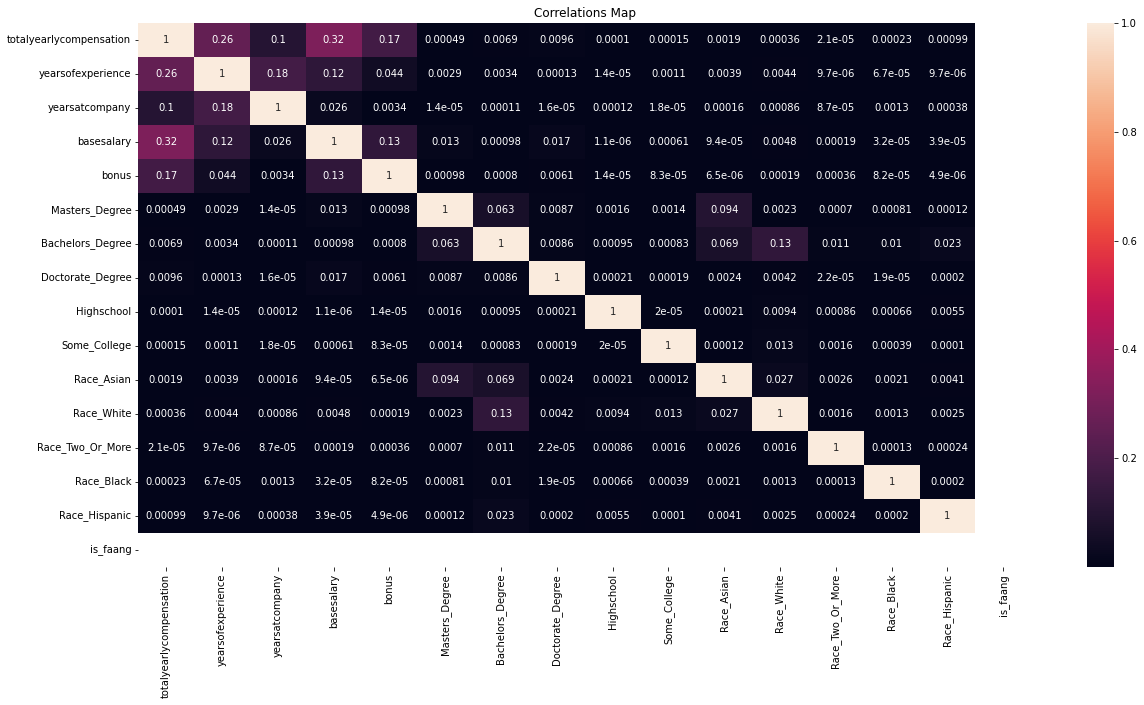

In [81]:
plt.figure(figsize= (20,10))

sn.heatmap(df.corr() **2,  annot= True)
plt.title('Correlations Map')

plt.show()

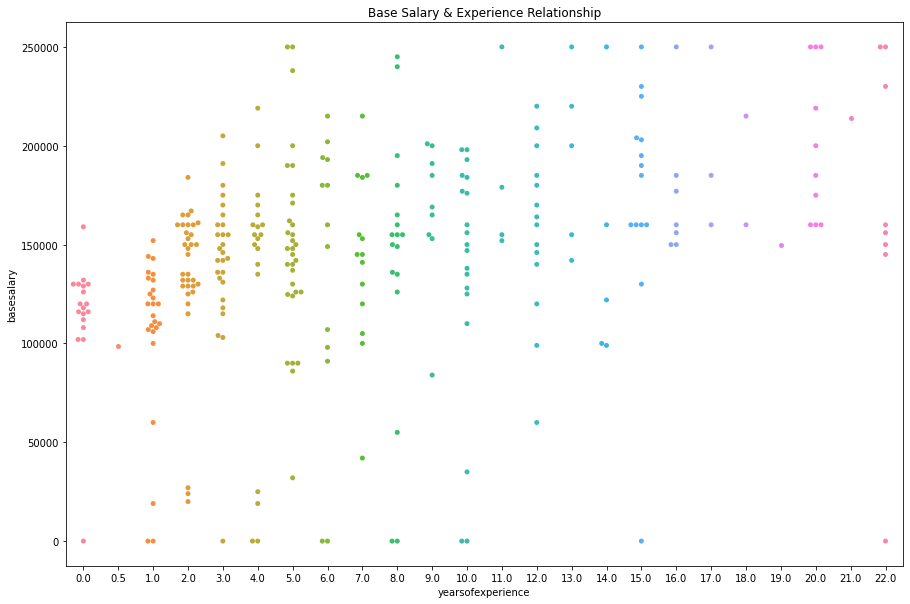

In [82]:
plt.figure(figsize= (15,10))

sn.swarmplot(data = df.sample(300), x= 'yearsofexperience', y = 'basesalary')
plt.title('Base Salary & Experience Relationship')

plt.show()

Text(0.5, 1.0, 'Salary per Company Distribution')

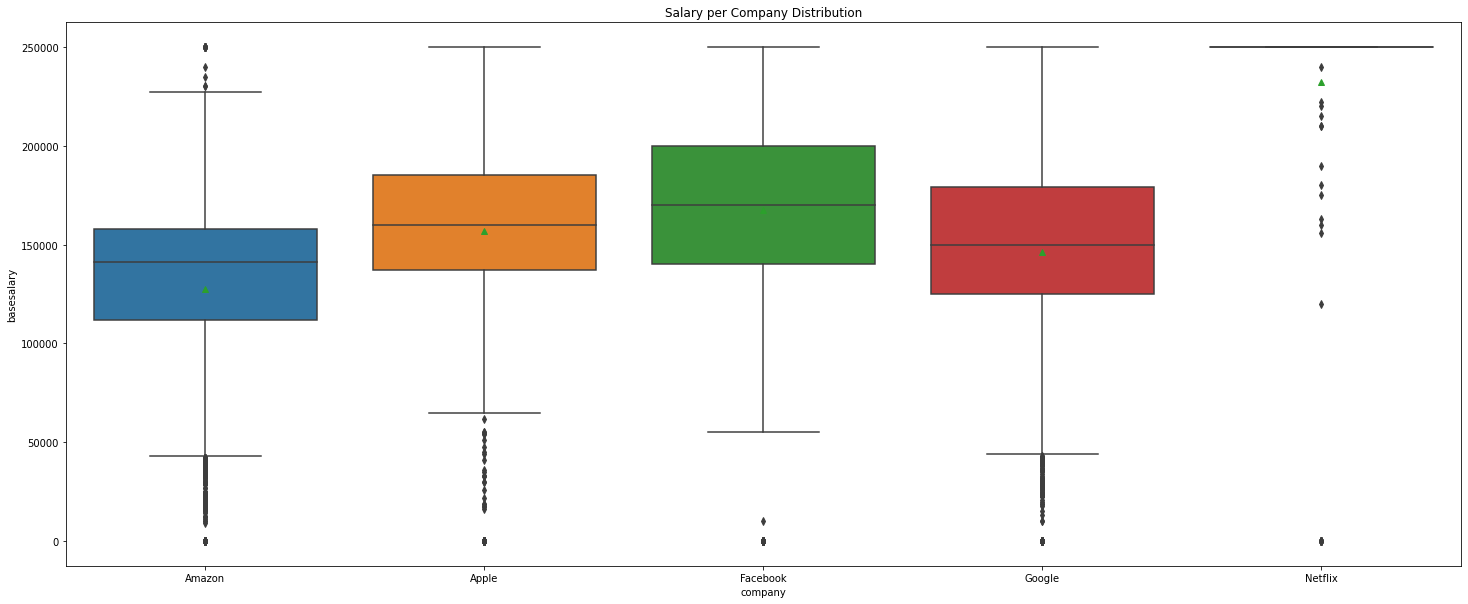

In [83]:
plt.figure(figsize= (25, 10))

sn.boxplot(data = df, x = 'company', y = 'basesalary', showmeans = True)
plt.title('Salary per Company Distribution')

In [84]:
from wordcloud import WordCloud

In [85]:
tag_words = ""
stop_words = {'nan', 'tittle'}

for i in df.tag:
    i = str(i)
    separate = i.split()
    for j in range(len(separate)):
        separate[j] = separate[j].lower()

    tag_words += " ".join(separate)

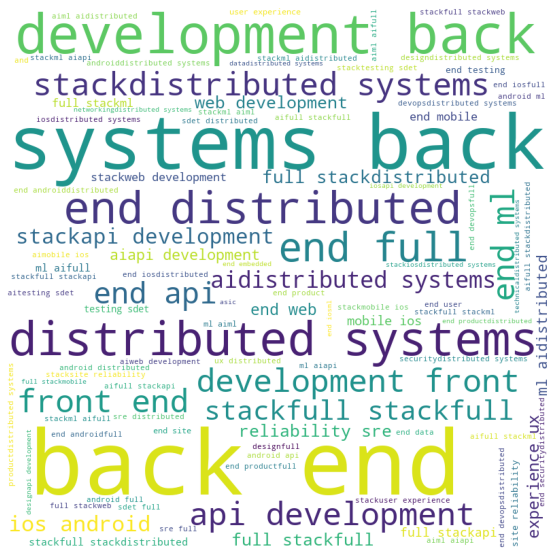

In [86]:
wordcloud_1 = WordCloud(width= 800, height= 800,
                        background_color= 'white',
                        stopwords= stop_words,
                        min_font_size= 10).generate(tag_words)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_1)
plt.axis('off')

plt.show()